# High Dynamic Range (HDR) Imaging

**Satya Mallick, LearnOpenCV.com**

!["HDR Image Example"](high-dynamic-range-hdr.jpg)

# Basic Idea

1. The **dynamic range** of images is limited to 8-bits (0 - 255) per channel
2. Very bright pixels saturate to 255
3. Very dark pixels clip to 0

# Step 1: Capture Multiple Exposures

!["HDR Image Sequence"](hdr-image-sequence.jpg)


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def readImagesAndTimes():
  # List of file names  
  filenames = ["img_0.033.jpg", "img_0.25.jpg", "img_2.5.jpg", "img_15.jpg"]
  
  # List of exposure times  
  times = np.array([ 1/30.0, 0.25, 2.5, 15.0 ], dtype=np.float32)
  
  # Read images 
  images = []
  for filename in filenames:
    im = cv2.imread(filename)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    images.append(im)
  
  return images, times


# Step 2: Align Images

![Aligned vs. Unaligned](aligned-unaligned-hdr-comparison.jpg)

In [3]:
# Read images and exposure times
images, times = readImagesAndTimes()

# Align Images
alignMTB = cv2.createAlignMTB()
alignMTB.process(images, images)

# Step 3: Estimate Camera Response Function

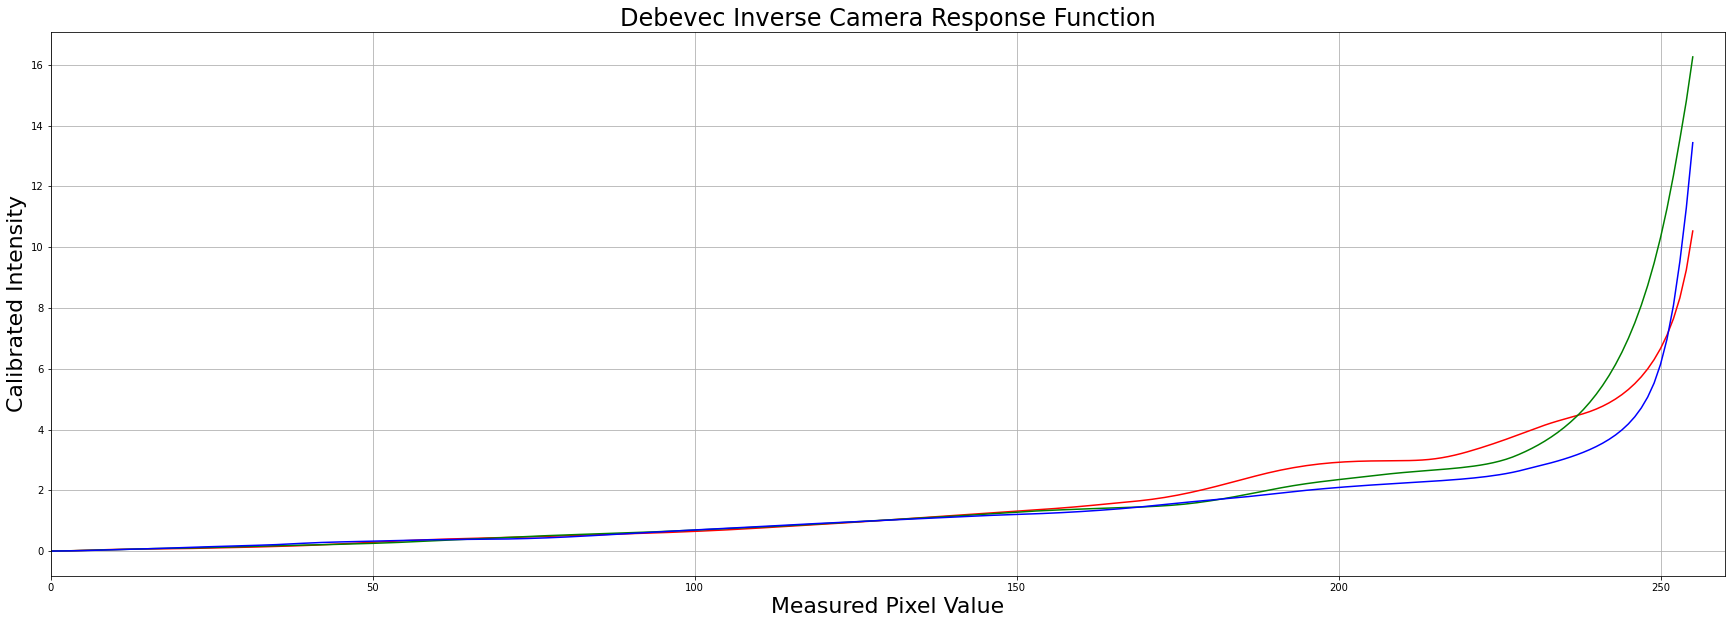

In [4]:
# Find Camera Response Function (CRF)
calibrateDebevec = cv2.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(images, times)

# Plot CRF
x = np.arange(256, dtype=np.uint8)
y = np.squeeze(responseDebevec)

ax = plt.figure(figsize=(30,10))
plt.title("Debevec Inverse Camera Response Function", fontsize=24)
plt.xlabel("Measured Pixel Value", fontsize=22)
plt.ylabel("Calibrated Intensity", fontsize=22)
plt.xlim([0,260])
plt.grid()
plt.plot(x, y[:,0],'r'  , x, y[:,1],'g', x, y[:,2],'b');

# Step 4: Merge Exposure into an HDR Image

In [5]:
# Merge images into an HDR linear image
mergeDebevec = cv2.createMergeDebevec()
hdrDebevec = mergeDebevec.process(images, times, responseDebevec)
print(hdrDebevec)

[[[0.01114213 0.01486893 0.02305605]
  [0.01114213 0.01486893 0.02305605]
  [0.00987909 0.01379156 0.02228927]
  ...
  [0.02126365 0.02160646 0.02579159]
  [0.0171823  0.01545648 0.01549376]
  [0.0156773  0.01377326 0.01370059]]

 [[0.00921581 0.01395171 0.02210711]
  [0.00930996 0.01404058 0.02227962]
  [0.00982038 0.01451631 0.02278653]
  ...
  [0.02033813 0.02149715 0.0263179 ]
  [0.02246197 0.02136202 0.02095472]
  [0.01963686 0.01919116 0.01896767]]

 [[0.00977664 0.01445887 0.02259931]
  [0.00873304 0.01348262 0.02155778]
  [0.00952886 0.01452081 0.02277654]
  ...
  [0.01887014 0.01995802 0.02502928]
  [0.01660828 0.01482547 0.01459011]
  [0.01963686 0.01919116 0.01896767]]

 ...

 [[0.0564596  0.04616486 0.02775304]
  [0.05687613 0.04577906 0.02889645]
  [0.05716071 0.04616686 0.02976038]
  ...
  [0.0279618  0.01850274 0.01650601]
  [0.02389618 0.02372922 0.01251322]
  [0.01844737 0.01817629 0.00931943]]

 [[0.05687613 0.04732456 0.02783507]
  [0.05462254 0.0449408  0.0277273 ]


# Step 5: Tonemapping 

Many Tonemapping algorithms are available in OpenCV. We chose Durand as it has more controls.

saved ldr-Drago.jpg


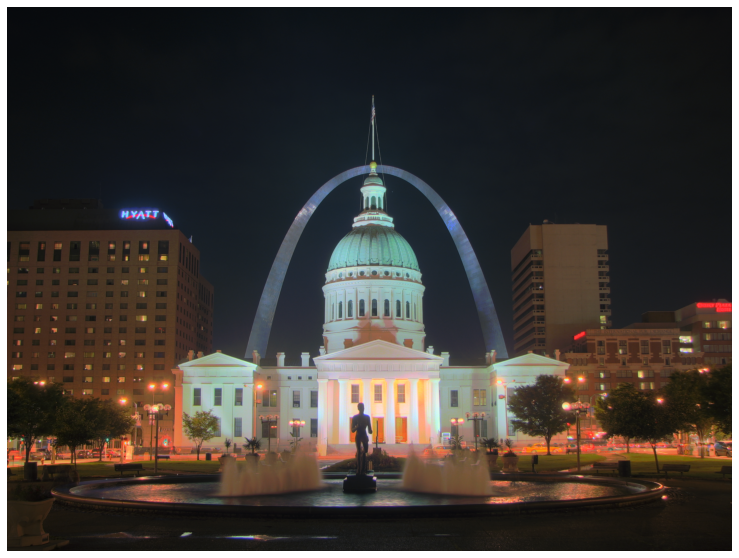

In [9]:
# Tonemap using Drago's method to obtain 24-bit color image
tonemapDrago = cv2.createTonemapDrago(1.0, 0.7)
ldrDrago = tonemapDrago.process(hdrDebevec)
ldrDrago = 3 * ldrDrago
plt.figure(figsize=(20,10)); plt.imshow(np.clip(ldrDrago,0,1)); plt.axis('off');
cv2.imwrite("ldr-Drago.jpg", ldrDrago * 255)
print("saved ldr-Drago.jpg")


Tonemaping using Reinhard's method ... 
saved ldr-Reinhard.jpg


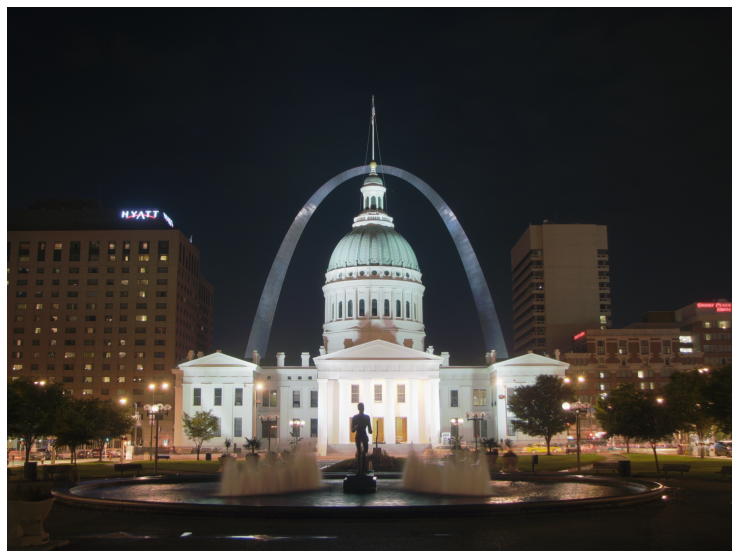

In [10]:
# Tonemap using Reinhard's method to obtain 24-bit color image
print("Tonemaping using Reinhard's method ... ")
tonemapReinhard = cv2.createTonemapReinhard(1.5, 0,0,0)
ldrReinhard = tonemapReinhard.process(hdrDebevec)
plt.figure(figsize=(20,10)); plt.imshow(np.clip(ldrReinhard,0,1)); plt.axis('off');
cv2.imwrite("ldr-Reinhard.jpg", ldrReinhard * 255)
print("saved ldr-Reinhard.jpg")

Tonemaping using Mantiuk's method ... 
saved ldr-Mantiuk.jpg


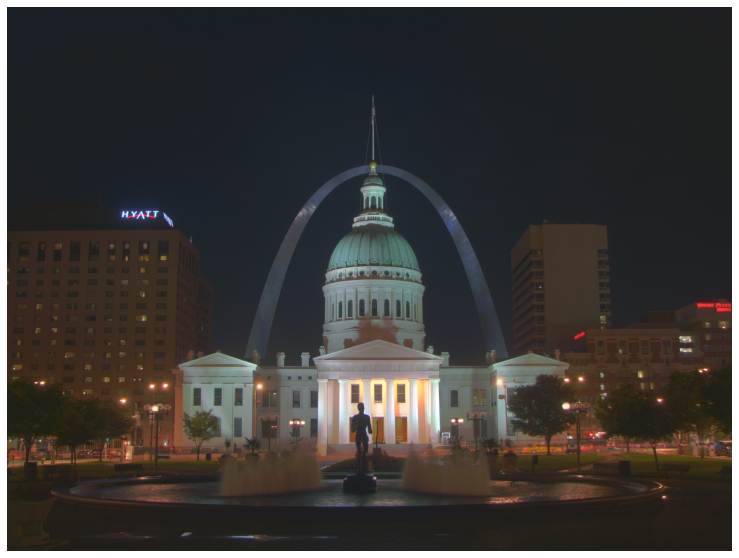

In [8]:
# Tonemap using Mantiuk's method to obtain 24-bit color image
print("Tonemaping using Mantiuk's method ... ")
tonemapMantiuk = cv2.createTonemapMantiuk(2.2,0.85, 1.2)
ldrMantiuk = tonemapMantiuk.process(hdrDebevec)
ldrMantiuk = 3 * ldrMantiuk
plt.figure(figsize=(20,10)); plt.imshow(np.clip(ldrMantiuk,0,1)); plt.axis('off');
cv2.imwrite("ldr-Mantiuk.jpg", ldrMantiuk * 255)
print("saved ldr-Mantiuk.jpg")